In [1]:
# ================================
# Exploratory Data Analysis (EDA)
# Vaishali Magar
# ================================

# 1. Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [3]:
# 2. Load Data

df = pd.read_csv(r"C:\Users\Vaishali Magar\Cleaned_Classes_April_June_2018.csv")
print("Shape of dataset:", df.shape)
display(df.head())

Shape of dataset: (3289, 8)


,ActivitySiteID,ActivityDescription,BookingStartTime,MaxBookees,Number_Booked,Price_INR,BookingEndDateTime,DynamicPrice
0,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-0.535512,-1.709436,2018-04-08,-2.26
1,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-0.219810,-1.709436,2018-04-15,-1.69
2,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-0.325044,-1.709436,2018-04-22,-1.88
3,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-0.851213,-1.709436,2018-04-29,-2.26
4,HXP,20-20-20 2.45pm-3.45pm,14:45:00,-0.475775,-1.061680,-1.709436,2018-05-06,-2.26


In [4]:
# 3. Data Info
print("\n--- Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ActivitySiteID       3289 non-null   object 
 1   ActivityDescription  3289 non-null   object 
 2   BookingStartTime     3289 non-null   object 
 3   MaxBookees           3289 non-null   float64
 4   Number_Booked        3289 non-null   float64
 5   Price_INR            3289 non-null   float64
 6   BookingEndDateTime   3289 non-null   object 
 7   DynamicPrice         3289 non-null   float64
dtypes: float64(4), object(4)
memory usage: 205.7+ KB
None

--- Missing Values ---
ActivitySiteID         0
ActivityDescription    0
BookingStartTime       0
MaxBookees             0
Number_Booked          0
Price_INR              0
BookingEndDateTime     0
DynamicPrice           0
dtype: int64


In [5]:
# 4. Descriptive Statistics
display(df.describe())

,MaxBookees,Number_Booked,Price_INR,DynamicPrice
count,3.289000e+03,3.289000e+03,3.289000e+03,3289.000000
mean,1.209802e-16,-1.123388e-16,-6.913155e-17,-0.021864
std,1.000152e+00,1.000152e+00,1.000152e+00,1.193893
min,-1.999978e+00,-1.693083e+00,-1.709436e+00,-2.590000
25%,-5.420451e-01,-7.459791e-01,-6.977698e-01,-0.840000
50%,-1.444272e-01,-1.145765e-01,-4.448533e-01,-0.400000
75%,1.869211e-01,7.272936e-01,8.197296e-01,0.740000
max,2.506359e+00,4.936644e+00,2.716604e+00,4.120000


In [6]:
# 5. Booking Trends Over Time
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"])
    bookings_per_day = df.groupby("date").size()

    plt.figure(figsize=(12,6))
    bookings_per_day.plot()
    plt.title("Daily Booking Trends")
    plt.xlabel("Date")
    plt.ylabel("Number of Bookings")
    plt.show()

In [7]:
# 6. Seasonal Patterns (Bookings by Day of Week)
if "date" in df.columns:
    df["day_of_week"] = df["date"].dt.day_name()
    plt.figure(figsize=(10,5))
    sns.countplot(x="day_of_week", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
    plt.title("Bookings by Day of Week")
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# 7. High Demand Classes
if "class_name" in df.columns:
    plt.figure(figsize=(12,6))
    top_classes = df["class_name"].value_counts().head(10)
    sns.barplot(x=top_classes.values, y=top_classes.index, palette="viridis")
    plt.title("Top 10 High-Demand Classes")
    plt.xlabel("Number of Bookings")
    plt.ylabel("Class Name")
    plt.show()

In [9]:
# 8. Outlier Detection - Attendance
if "attendance" in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df["attendance"])
    plt.title("Outliers in Attendance")
    plt.show()

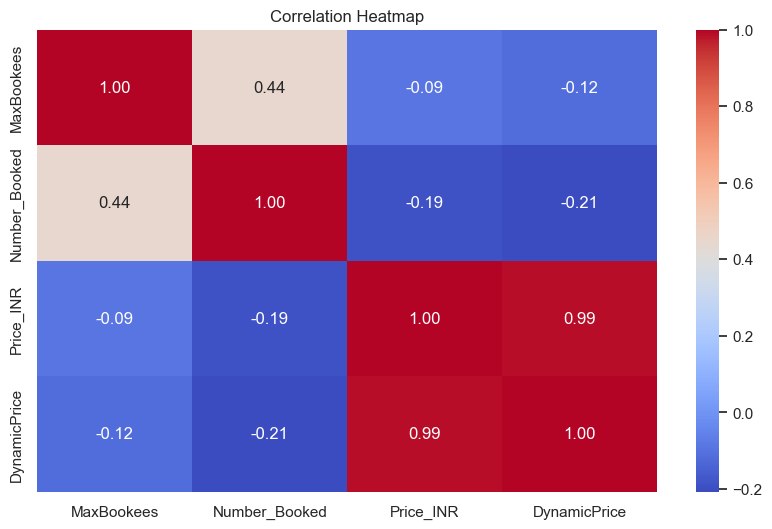

✅ EDA Completed


In [10]:
# 9. Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print("✅ EDA Completed")